In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
import seaborn as sb
from pandas.plotting import scatter_matrix

In [2]:
# you can either ignore the header row of the CSV file or specify the column names using the name parameter
cols=["ID","Target Diagnosis","mean radius","mean texture","mean perimeter",
      "mean area","mean smoothness","mean compactness","mean concavity",
      "mean concave points","mean symmetry","mean fractal dimension","radius error",
      "texture error","perimeter error","area error","smoothness error","compactness error",
      "concavity error","concave points error","symmetry error","fractal dimension error",
      "worst radius","worst texture","worst perimeter","worst area","worst smoothness",
      "worst compactness","worst concavity","worst concave points","worst symmetry",
      "worst fractal dimension"]
#data importation 
data = pd.read_csv("input/wdbc.data",names=cols)
data.head()

,ID,Target Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
colors = data['Target Diagnosis'].astype('category')

# Les couleurs déduites de chaque espèce d'iris
y = colors.cat.codes 
X = data.iloc[:,2:32]
print(X) ; print(y)

# from pandas.plotting import scatter_matrix

# scatter_matrix(X,c=y) 
# plt.show()

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [5]:
def center_reduite(x):
    return (x-x.mean())/np.std(x)
center_reduite = center_reduite(X)
print("the centered and reduced matrix is:\n")
center_reduite.head()

the centered and reduced matrix is:



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [66]:
#function to determine the correlation matrix
def matrice_correlation(x):
    matrice_corr = 1/x.shape[0]*x.T.dot(x)
    return matrice_corr
matrice_corr = matrice_correlation(center_reduite)
print("the correlation matrix")
matrice_corr.head(6)

the correlation matrix


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382


In [67]:
#function to determine values and eigen values
def vect_val_propre(X):
    [Lambda,A]=eig(matrice_corr)
    idx=Lambda.argsort()[::-1]
    A = A[:,idx]
    Lambda = Lambda[idx]
    return Lambda,A
Lambda, A =vect_val_propre(center_reduite)
print("the eigen values are:\n",Lambda)
print("the eigen vector are :\n",A)

the eigen values are:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 3.11594025e-02
 2.99728939e-02 2.74394025e-02 2.43408378e-02 1.80550070e-02
 1.54812714e-02 8.17763986e-03 6.90046388e-03 1.58933787e-03
 7.48803097e-04 1.33044823e-04]
the eigen vector are :
 [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02 -5.11187749e-02  1.50583883e-01
  -2.02924255e-01 -1.46712338e-01 -2.25384659e-01 -4.96986642e-02
   6.85700057e-02 -7.29289034e-02  9.85526942e-02 -1.82579441e-01
   1.92264989e-02  1.29476396e-01 -1.31526670e-01 -2.11194013e-01
   2.11460455e-01 -7.02414091e-0

In [68]:
Lambda

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

[44.27202560752641, 18.971182044033068, 9.393163257431379, 6.602134915470123, 5.495768492346269, 4.024522039883342, 2.2507337129825027, 1.5887238000213255, 1.3896493745591103, 1.168978189413149, 0.9797189875980136, 0.8705379007378826, 0.8045249871967326, 0.5233657454926364, 0.3137832167627408, 0.2662093365152321, 0.19799679253242752, 0.1753959450226361, 0.1649253059225162, 0.10386467483387046, 0.0999096463700266, 0.09146467510543395, 0.08113612588990995, 0.060183356667167766, 0.051604237916518005, 0.027258799547748853, 0.02300154625059641, 0.0052977929038088255, 0.002496010324688066, 0.00044348274273723216]


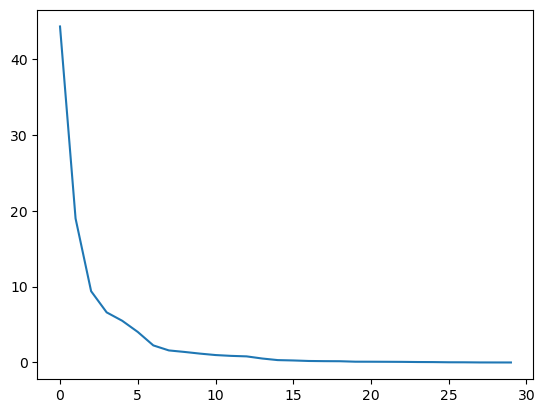

In [70]:
#function to determine the percentage of inertia for each eigenvalue
def percent_inertie(Lambda):
    L=[]
    for i in Lambda:
        L.append(i/Lambda.sum()*100)
    return L  
percent_inertie= percent_inertie(Lambda)
print(percent_inertie)
plt.plot(percent_inertie)

In [81]:
#function to determine the number of main axis
def num_axe_principal(percent,percent_target):
    nbr=0
    sum_percent=0
    for i in percent:
        sum_percent+=i
        nbr+=1
        if(sum_percent>=percent_target):
            return nbr
    return nbr
num_axe = num_axe_principal(percent_inertie,65)
print("the number of axis required is : ",num_axe)

the number of axis required is :  3


In [72]:
# function to calculate the principal components
def my_pca(num_axe_principal,matrice_reduire,A):
    Yi = []
    for i in range(num_axe_principal):
        Yi.append(matrice_reduire.dot(A[i].T))
    return np.array(Yi)
Composant_pricipal = my_pca(num_axe,center_reduite,A)
Composant_pricipal.shape

(5, 569)

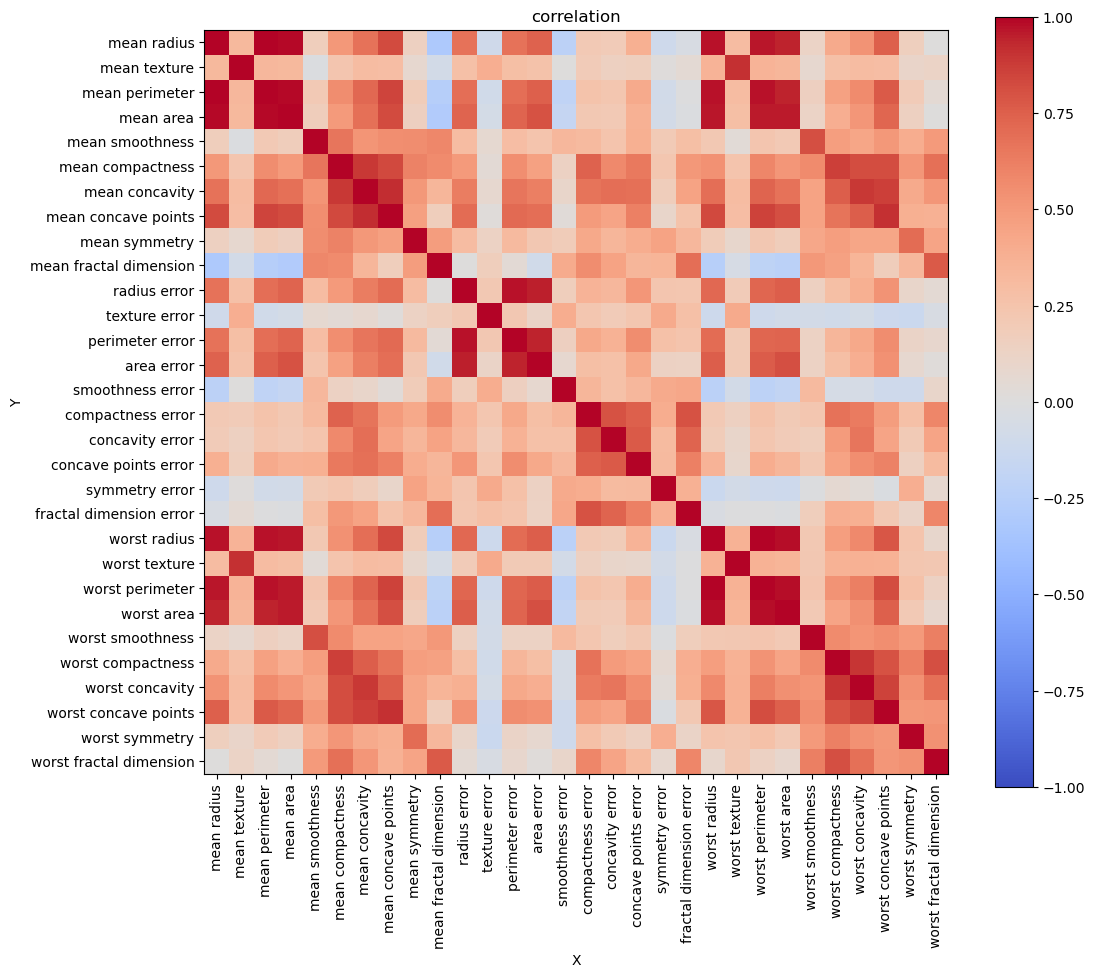

In [73]:
#The heatmap makes visually the correlations between the variables
cols2=["mean radius","mean texture","mean perimeter","mean area",
       "mean smoothness","mean compactness","mean concavity",
       "mean concave points","mean symmetry","mean fractal dimension",
       "radius error","texture error","perimeter error","area error",
       "smoothness error","compactness error","concavity error",
       "concave points error","symmetry error","fractal dimension error",
       "worst radius","worst texture","worst perimeter","worst area",
       "worst smoothness","worst compactness","worst concavity",
       "worst concave points","worst symmetry","worst fractal dimension"]
plt.figure(figsize=(12,10))
plt.imshow(matrice_corr,cmap="coolwarm",vmin=-1,vmax=1)
plt.colorbar()
plt.title("correlation")
plt.xticks(range(len(cols2)), cols2, rotation=90)
plt.yticks(range(len(cols2)), cols2)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()